<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/MineracaoDados/blob/main/VisualizacaoDadosTrilha6_BrunaMatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


## **T6 – Atividade de Aprofundamento**
---

Definir um projeto, desde o início.

In [2]:
# Import de algumas bibliotecas normalmente utilizadas na explocação dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Análise Exploratória de Dados

In [4]:
# Lendo a tabela
# Fonte: https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022 
df = pd.read_csv("layoffs_data.csv")
df.head()


,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Lyst,London,Retail,50.0,0.25,2022-11-29,https://techcrunch.com/2022/11/29/lyst-the-uk-...,144.0,Unknown,2022-11-30 06:03:36,United Kingdom,Unknown
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
2,Codexis,SF Bay Area,Healthcare,NaN,0.18,2022-11-29,https://www.codexis.com/investors/news-events/...,162.0,IPO,2022-11-30 06:17:39,United States,Unknown
3,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,https://techpoint.africa/2022/11/29/lazerpay-s...,NaN,Unknown,2022-11-30 05:59:51,Nigeria,Unknown
4,MessageBird,Amsterdam,Other,NaN,0.31,2022-11-29,https://tech.eu/2022/11/29/messagebird-lay-off...,1100.0,Series C,2022-11-30 05:57:28,Netherlands,Unknown


In [5]:
# Inicialmente vamos analisar todas as colunas
df.describe(include='all')

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
count,1696,1696,1696,1197.000000,1137.000000,1696,1696,1575.000000,1696,1696,1696,1696
unique,1421,161,28,NaN,NaN,400,1525,NaN,15,1657,55,128
top,Uber,SF Bay Area,Finance,NaN,NaN,2020-04-02,Internal memo,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown
freq,5,452,208,NaN,NaN,27,72,NaN,292,40,1119,1567
mean,NaN,NaN,NaN,197.218881,0.278019,NaN,NaN,877.535426,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,572.919551,0.268455,NaN,NaN,6450.501204,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,31.000000,0.100000,NaN,NaN,43.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.000000,0.190000,NaN,NaN,132.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,150.000000,0.330000,NaN,NaN,380.000000,NaN,NaN,NaN,NaN


In [6]:
# Foi possível observar que as colunas Laid_Off_Count,Percentage e Funds_Raised	possuem valores nulos
# que vamos precisar tratar
# Vaos calcular a percentagem de valores nulos
# vamos então tentar encontrar a quantidade de valores nulos 
(df.isnull().sum() / len(df))*100

Company                        0.000000
Location                       0.000000
Industry                       0.000000
Laid_Off_Count                29.422170
Percentage                    32.959906
Date                           0.000000
Source                         0.000000
Funds_Raised                   7.134434
Stage                          0.000000
Date_Added                     0.000000
Country                        0.000000
List_of_Employees_Laid_Off     0.000000
dtype: float64

In [10]:
# São muitos valores para que simplismente remover. Logo teremos que mexer com a base de dados para incluir valores nesses casos
# Nesse caso vamos substituir os valores nulos pela média, pois são dodas variáveis numéricas 


df['Laid_Off_Count'] = df[['Laid_Off_Count']].fillna(df['Laid_Off_Count'].mean())
df['Percentage'] = df[['Percentage']].fillna(df['Percentage'].mean())
df['Funds_Raised'] = df[['Funds_Raised']].fillna(df['Funds_Raised'].mean())

print((df.isnull().sum() / len(df))*100)
df.describe(include='all')

Company                       0.0
Location                      0.0
Industry                      0.0
Laid_Off_Count                0.0
Percentage                    0.0
Date                          0.0
Source                        0.0
Funds_Raised                  0.0
Stage                         0.0
Date_Added                    0.0
Country                       0.0
List_of_Employees_Laid_Off    0.0
dtype: float64


,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
count,1696,1696,1696,1696.000000,1696.000000,1696,1696,1696.000000,1696,1696,1696,1696
unique,1421,161,28,NaN,NaN,400,1525,NaN,15,1657,55,128
top,Uber,SF Bay Area,Finance,NaN,NaN,2020-04-02,Internal memo,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown
freq,5,452,208,NaN,NaN,27,72,NaN,292,40,1119,1567
mean,NaN,NaN,NaN,197.218881,0.278019,NaN,NaN,877.535426,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,481.254032,0.219774,NaN,NaN,6215.999536,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,47.000000,0.140000,NaN,NaN,48.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,130.000000,0.278019,NaN,NaN,156.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,197.218881,0.278019,NaN,NaN,511.250000,NaN,NaN,NaN,NaN


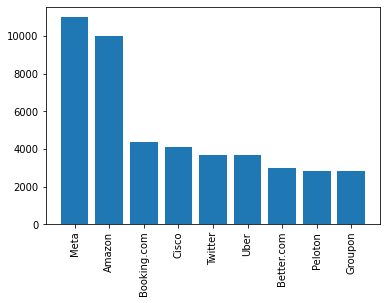

In [20]:
# Vamos ver quais foram as 10 empresas com maior numero de layoffs
df_filtered = df.nlargest(10, 'Laid_Off_Count')
company = df_filtered['Company']
laydoff = df_filtered['Laid_Off_Count']

plt.bar(company,laydoff)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Vamos analisar a percentagem dentro das empresas com maior número de layoff
df_filtered["Percentage"] = df_filtered["Percentage"]*100
print(df_filtered.Percentage)
display(df_filtered.describe(include='all'))


115     13.0
53       3.0
1120    25.0
54       5.0
144     50.0
1269    14.0
1000    33.0
1224    13.0
1013    20.0
1424    44.0
Name: Percentage, dtype: float64


,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
count,10,10,10,10.000000,10.000000,10,10,10.000000,10,10,10,10
unique,9,5,7,NaN,NaN,9,10,NaN,3,10,2,4
top,Uber,SF Bay Area,Consumer,NaN,NaN,2022-11-16,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,NaN,IPO,2022-11-09 15:04:03,United States,Unknown
freq,2,5,2,NaN,NaN,2,1,NaN,8,1,9,7
mean,NaN,NaN,NaN,4847.500000,22.000000,NaN,NaN,9349.253543,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3037.324526,15.909466,NaN,NaN,11526.179590,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2800.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3000.000000,13.000000,NaN,NaN,884.401569,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3700.000000,17.000000,NaN,NaN,1650.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4306.250000,31.000000,NaN,NaN,21750.000000,NaN,NaN,NaN,NaN


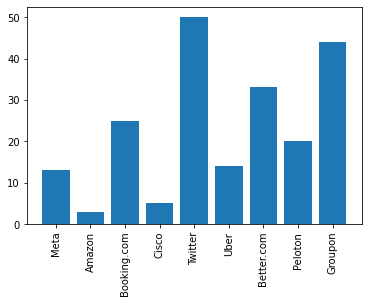

In [22]:
percentage = df_filtered["Percentage"]
price = df_filtered["Company"]

plt.bar(price,percentage)
plt.xticks(rotation=90)
plt.show()